In [1]:
import pandas as pd 
import numpy as np

In [3]:
data = pd.read_csv(r"C:\\Users\\vinay\\Desktop\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
data.drop(columns = ["customerID"],inplace = True)

In [13]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [15]:
print(data.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

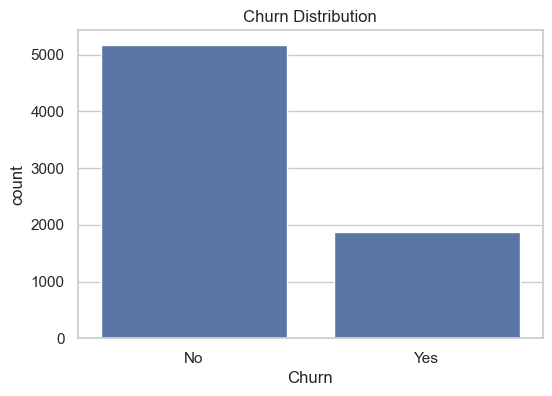

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(x="Churn",data=data,)
plt.title("Churn Distribution")
plt.show()

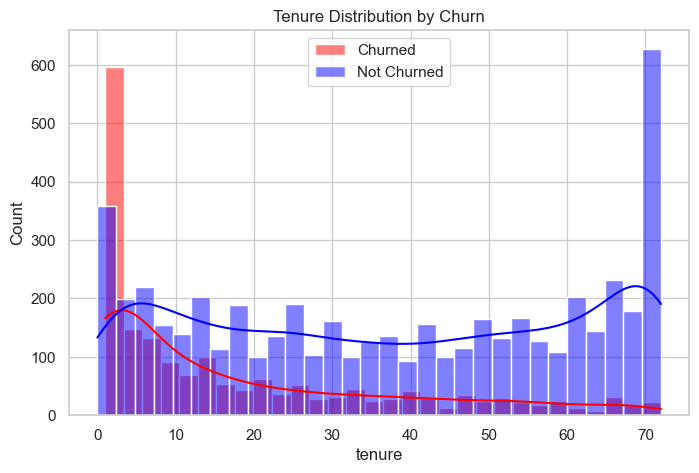

In [21]:
# Tenure distribution by churn
plt.figure(figsize=(8,5))
sns.histplot(data[data['Churn'] == 'Yes']['tenure'], bins=30, kde=True, color="red", label="Churned")
sns.histplot(data[data['Churn'] == 'No']['tenure'], bins=30, kde=True, color="blue", label="Not Churned")
plt.title("Tenure Distribution by Churn")
plt.legend()
plt.show()

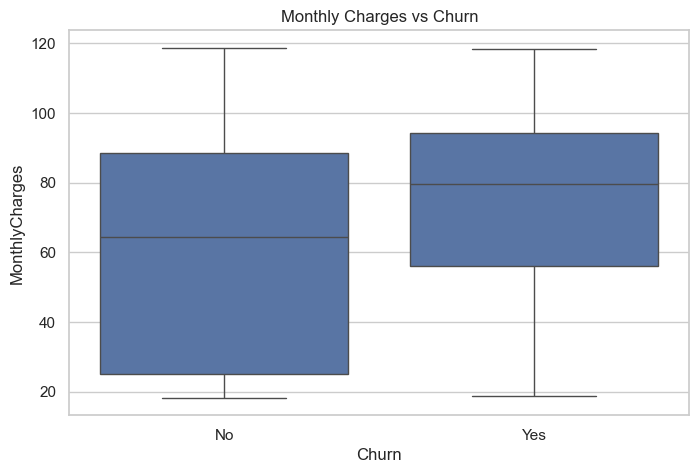

In [25]:
# Monthly Charges vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=data)
plt.title("Monthly Charges vs Churn")
plt.show()

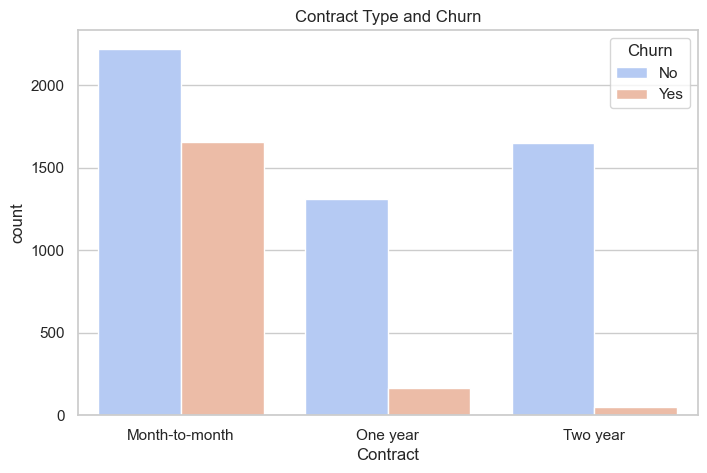

In [27]:
# Contract Type Impact on Churn
plt.figure(figsize=(8,5))
sns.countplot(x="Contract", hue="Churn", data=data, palette="coolwarm")
plt.title("Contract Type and Churn")
plt.show()

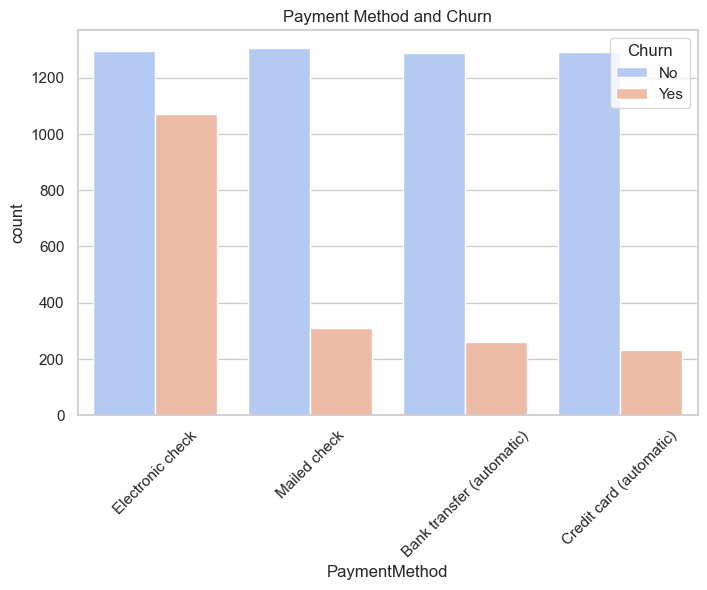

In [29]:
sns.set(style="whitegrid")

# Plot Payment Method vs Churn
plt.figure(figsize=(8,5))
sns.countplot(x="PaymentMethod", hue="Churn", data=data, palette="coolwarm")
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.title("Payment Method and Churn")
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [33]:
import pandas as pd

data["Churn"] = data["Churn"].map({"Yes": 1, "No": 0})

data["gender"] = data["gender"].map({"Male": 1, "Female": 0})

binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    data[col] = data[col].map({"Yes": 1, "No": 0})

service_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in service_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0})  

categorical_cols = ['InternetService', 'Contract', 'PaymentMethod']

existing_cols = [col for col in categorical_cols if col in data.columns]

if existing_cols: 
    data = pd.get_dummies(data, columns=existing_cols, drop_first=True)
else:
    print("Skipping One-Hot Encoding: No categorical columns found")


if 'customerID' in data.columns:
    data.drop(columns=['customerID'], inplace=True)


print("Data after encoding:")
print(data.head())
print("Data types:\n", data.dtypes)

Data after encoding:
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   MonthlyCharges  TotalCharges  Churn  InternetService_Fiber optic  \
0           29.85         29.85      0    

In [37]:
print("Missing values in dataset before SMOTE:")
print(data.isnull().sum())

Missing values in dataset before SMOTE:
gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
MultipleLines                             0
OnlineSecurity                            0
OnlineBackup                              0
DeviceProtection                          0
TechSupport                               0
StreamingTV                               0
StreamingMovies                           0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
InternetService_Fiber optic               0
InternetService_No                        0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic

In [39]:
# Convert 'TotalCharges' to numeric again (to ensure correct format)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Fill missing values in 'TotalCharges' with the median value
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Verify again
print("Missing values after fixing TotalCharges:")
print(data.isnull().sum())

Missing values after fixing TotalCharges:
gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMetho

C:\Users\vinay\AppData\Local\Temp\ipykernel_17284\101115999.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(columns=['Churn'])  # Features
y = data['Churn']  # Target variable

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Class distribution after SMOTE:
Churn
0    5174
1    5174
Name: count, dtype: int64
Training samples: 8278
Testing samples: 2070


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.8531400966183574

Confusion Matrix:
 [[865 156]
 [148 901]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1021
           1       0.85      0.86      0.86      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, None],  # Depth of each tree
    'min_samples_split': [2, 5, 10]  # Minimum samples needed to split a node
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(" Best Parameters Found:", best_params)

# Train the best model using these parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred_best_rf = best_rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate optimized model
print("\n Optimized Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf))


 Best Parameters Found: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

 Optimized Random Forest Model Accuracy: 0.8531400966183574

Confusion Matrix:
 [[863 158]
 [146 903]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1021
           1       0.85      0.86      0.86      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



In [49]:
import joblib

# Save the trained model
joblib.dump(rf_model, "churn_model.pkl")  # Replace best_model with your actual model variable


['churn_model.pkl']